## Music genre classifier

#### Importing required libraries

In [3]:
import pandas as pd
import numpy as np
import scipy
import sys
import os
import pickle 
import librosa
import librosa.display 
import matplotlib.pyplot as plt
from IPython.display import Audio 
import IPython
import tensorflow as tf
from tensorflow import keras 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential 

#### Loading the data into a pandas dataframe

In [4]:
music_data = pd.read_csv('features_3_sec.csv')
music_data.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.051501            65671.875673  ...   64.748276   
2              2084.565132            75124.921716  ...   67.336563   
3              1960.039988            82913.639269  ...   47.739452   
4              1948.503884            60204.020268  ...   30.336359   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1    -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   
2    -1.768610   28.348579     2.378768   45.717648    -1.938424   53.050835   
3    -3.841155   28.337118     1.218588   34.770935    -3.580352   50.836224   
4     0.664582   45.880913     1.689446   51.363583    -3.392489   26.738789   

   mfcc20_mean  mfcc20_var  label  
0    -0.243027   43.771767  blues  
1     5.784063   59.943081  blues  
2     2.517375   33.105122  blues  
3     3.630866   32.023678  blues  
4     0.536961   29.146694  blues  

[5 rows x 60 columns]

In [5]:
music_data = music_data.drop(labels='filename',axis=1)

### 1. Visualizing the data 

### Audio 1

In [6]:
audio_recording = 'Data//genres_original/country/country.00050.wav'
data, sr = librosa.load(audio_recording)
IPython.display.Audio(data,rate=sr)

#### Waveplot

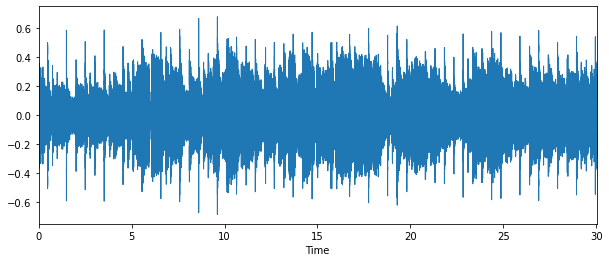

In [7]:
plt.figure(figsize=(10,4))
librosa.display.waveplot(data)
plt.show()

#### Spectrogram

temp = librosa.stft(data)
temp = librosa.amplitude_to_db(abs(temp))
plt.figure(figsize=(10,4))
librosa.display.specshow(temp,sr=sr,x_axis='time',y_axis = 'hz')
plt.colorbar()

### Audio 2

In [8]:
audio_recording = 'Data//genres_original/blues/blues.00050.wav'
data, sr = librosa.load(audio_recording)
IPython.display.Audio(data,rate=sr)

#### Waveplot

plt.figure(figsize=(10,4))
librosa.display.waveplot(data)
plt.show()

#### Spectrogram

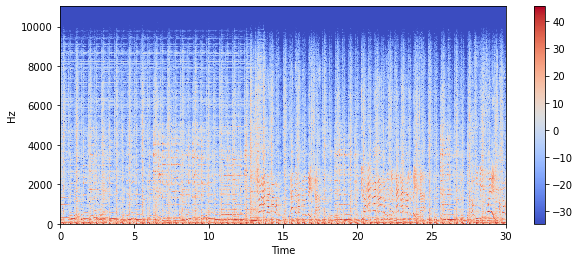

In [9]:
temp = librosa.stft(data)
temp = librosa.amplitude_to_db(abs(temp))
plt.figure(figsize=(10,4))
librosa.display.specshow(temp,sr=sr,x_axis='time',y_axis = 'hz')
plt.colorbar()

### Audio 3

In [10]:
audio_recording = 'Data//genres_original/classical/classical.00050.wav'
data, sr = librosa.load(audio_recording)
IPython.display.Audio(data,rate=sr)

#### Waveplot

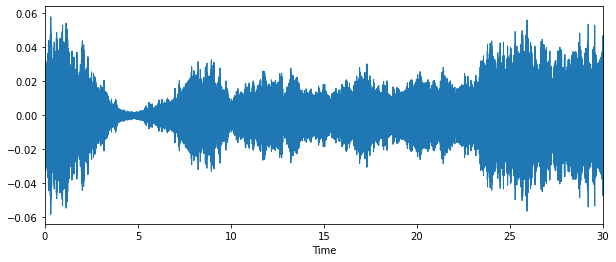

In [11]:
plt.figure(figsize=(10,4))
librosa.display.waveplot(data)
plt.show()

#### Spectogram

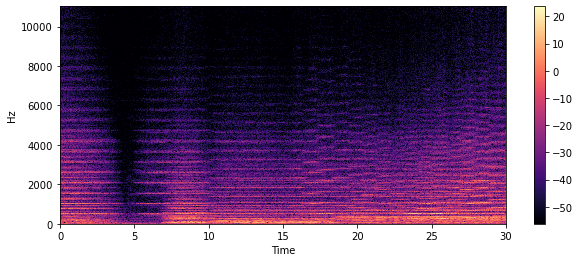

In [12]:
temp = librosa.stft(data)
temp = librosa.amplitude_to_db(abs(temp))
plt.figure(figsize=(10,4))
librosa.display.specshow(temp,sr=sr,x_axis='time',y_axis = 'hz')
plt.colorbar()

### 2. Training the model

In [13]:
var = music_data.iloc[:,-1]
converter = LabelEncoder()
y = converter.fit_transform(var)

In [14]:
fit = StandardScaler() # Try changing to minmax
X = fit.fit_transform(np.array(music_data.iloc[:,:-1],dtype=float))

#### Splitting the data into train and test sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33)

In [16]:
X_train.shape

(6693, 58)

#### Using a keras sequential model with 6 layers, leaky relu as the activation function and softmax regression for the last layer

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='leaky_relu',input_shape = (X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='leaky_relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='leaky_relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='leaky_relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='leaky_relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='leaky_relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation = 'softmax')
])

#### Using the Adam optimizer for gradient descent 

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### Training the model

In [19]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100


C:\Users\Isha\anaconda3\lib\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


210/210 [==============================] - 7s 29ms/step - loss: 1.2702 - accuracy: 0.5570
Epoch 2/100
210/210 [==============================] - 6s 29ms/step - loss: 0.9345 - accuracy: 0.6858
Epoch 3/100
210/210 [==============================] - 6s 29ms/step - loss: 0.7934 - accuracy: 0.7297
Epoch 4/100
210/210 [==============================] - 6s 30ms/step - loss: 0.7018 - accuracy: 0.7651
Epoch 5/100
210/210 [==============================] - 6s 29ms/step - loss: 0.6450 - accuracy: 0.7835
Epoch 6/100
210/210 [==============================] - 6s 26ms/step - loss: 0.5736 - accuracy: 0.8074
Epoch 7/100
210/210 [==============================] - 6s 26ms/step - loss: 0.5516 - accuracy: 0.8194
Epoch 8/100
210/210 [==============================] - 6s 27ms/step - loss: 0.5003 - accuracy: 0.8315
Epoch 9/100
210/210 [==============================] - 5s 25ms/step - loss: 0.4599 - accuracy: 0.8458
Epoch 10/100
210/210 [==============================] - 5s 26ms/step - loss: 0.4722 - accuracy

### 3. Test accuracy 

In [20]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print('Test accuracy:', test_acc)

104/104 - 1s - loss: 0.5792 - accuracy: 0.9020
Test accuracy: 0.9020321369171143
